# Procesamiento de lenguaje natural
## Bert Sentiment Analysis


In [1]:
!pip install transformers --quiet

In [2]:
import tensorflow
from transformers import TFBertModel
import tf_keras

2024-07-01 17:19:34.808491: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-01 17:19:34.819035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 17:19:34.832982: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 17:19:34.833009: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-01 17:19:34.841962: I tensorflow/core/platform/cpu_feature_gua

### Definiendo modelo

In [3]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

2024-07-01 17:19:38.100574: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-01 17:19:38.107557: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-01 17:19:38.117377: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
max_length = 140
output_shape = 3

In [5]:
import tensorflow as tf
#import 
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.F1Score(average='macro')])

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

In [7]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [8]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0  85442      0  0:00:01  0:00:01 --:--:--  127k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   404k      0  0:00:17  0:00:17 --:--:-- 1906k


In [9]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [10]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


<Axes: xlabel='score', ylabel='count'>

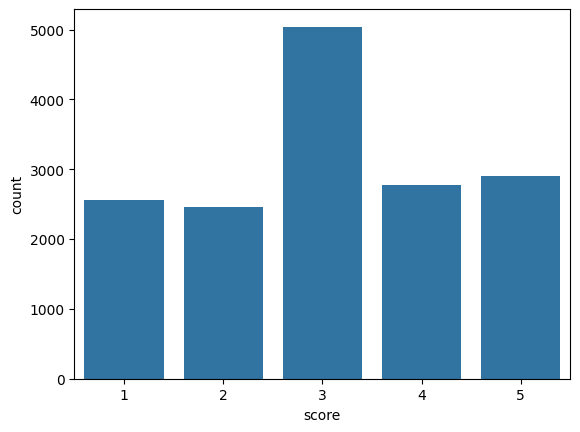

In [11]:
# ¿Cómo están balanceados los datos?
import seaborn as sns
import matplotlib.pyplot as plt  # Importa matplotlib.pyplot para mostrar gráficos
sns.countplot(x=df.score)

## Limpieza de datos

In [12]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']
# Contar las ocurrencias de cada clase en la columna `sentiment`
counts = df['sentiment'].value_counts().sort_index()

print(counts)


sentiment
0    5028
1    5042
2    5676
Name: count, dtype: int64


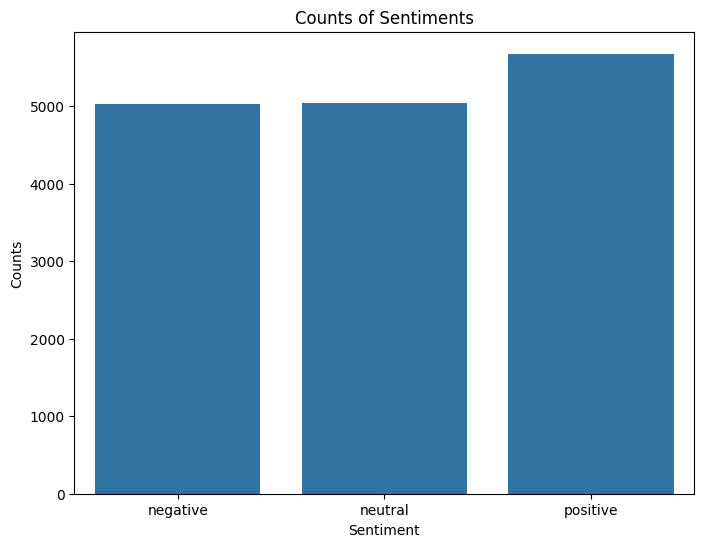

In [13]:
# Crear el gráfico de barras usando seaborn
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.barplot(x=class_names, y=counts)
# Personalizar el gráfico
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Counts of Sentiments')

plt.show()

In [14]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median: 139.0


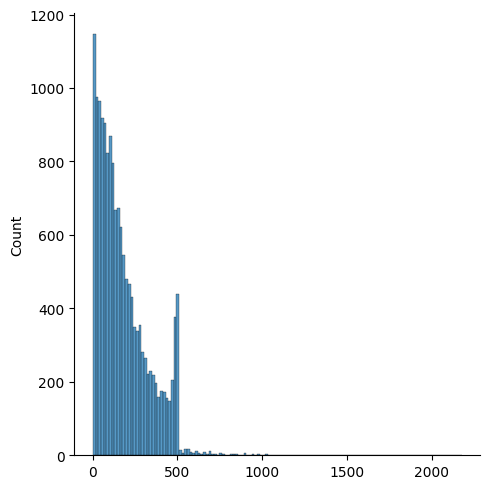

In [15]:
import numpy as np
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


## 1 - Data generator


In [18]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer
import numpy as np

In [19]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [20]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [21]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [22]:

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i], 
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]
  
    return train_InputExamples, validation_InputExamples

 
def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [23]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [24]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [25]:
X_test = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [26]:
y_test = y[idx_test]
print(y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


## 2 - BERT multiclass classification

In [38]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
    315/Unknown - 61s 193ms/step - loss: 0.9523 - accuracy: 0.5306 - f1_score: 0.5193

2024-07-01 20:11:42.707799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-01 20:11:42.707843: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 11508614096383773546
2024-07-01 20:11:42.707846: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 13038982676870578679
2024-07-01 20:11:42.707849: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 11564808238939562447
2024-07-01 20:11:42.707852: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 14069981986756539797
2024-07-01 20:11:42.707954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[model/tf_bert_model/bert/Sha

315/315 [==============================] - 75s 238ms/step - loss: 0.9523 - accuracy: 0.5306 - f1_score: 0.5193 - val_loss: 0.9091 - val_accuracy: 0.5520 - val_f1_score: 0.4975
Epoch 2/20


2024-07-01 20:11:56.803332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-01 20:11:56.803371: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 11508614096383773546
2024-07-01 20:11:56.803375: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 13038982676870578679
2024-07-01 20:11:56.803395: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 11564808238939562447
2024-07-01 20:11:56.803399: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 14069981986756539797
2024-07-01 20:11:56.803422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


315/315 [==============================] - 76s 241ms/step - loss: 0.9436 - accuracy: 0.5419 - f1_score: 0.5310 - val_loss: 0.8899 - val_accuracy: 0.5639 - val_f1_score: 0.5020
Epoch 3/20
315/315 [==============================] - 76s 241ms/step - loss: 0.9376 - accuracy: 0.5434 - f1_score: 0.5329 - val_loss: 0.8806 - val_accuracy: 0.5702 - val_f1_score: 0.5230
Epoch 4/20
315/315 [==============================] - 76s 241ms/step - loss: 0.9299 - accuracy: 0.5487 - f1_score: 0.5393 - val_loss: 0.8756 - val_accuracy: 0.5690 - val_f1_score: 0.5377
Epoch 5/20
315/315 [==============================] - 76s 241ms/step - loss: 0.9331 - accuracy: 0.5404 - f1_score: 0.5295 - val_loss: 0.8888 - val_accuracy: 0.5702 - val_f1_score: 0.5016
Epoch 6/20
315/315 [==============================] - 76s 242ms/step - loss: 0.9335 - accuracy: 0.5461 - f1_score: 0.5351 - val_loss: 0.8690 - val_accuracy: 0.5742 - val_f1_score: 0.5283
Epoch 7/20
315/315 [==============================] - 76s 242ms/step - loss:

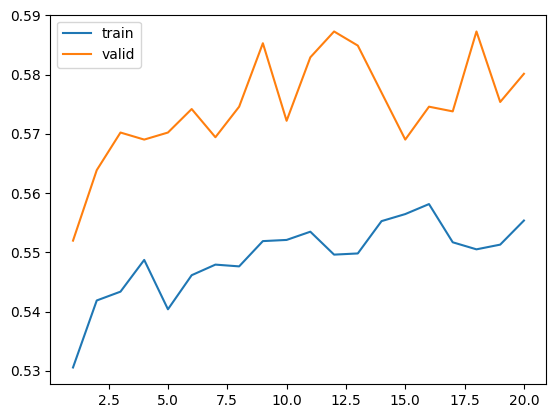

In [39]:
plot_train_metrics(history)

In [40]:
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 18s 176ms/step


array([[0.6366126 , 0.24924038, 0.11414703],
       [0.50692827, 0.23134124, 0.26173055],
       [0.22777426, 0.34314677, 0.42907897]], dtype=float32)

In [41]:
y_hat = np.argmax(y_hat_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print(y_test_labels)

[0 0 0 ... 1 2 2]


In [42]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 18s 180ms/step - loss: 0.8687 - accuracy: 0.5971 - f1_score: 0.5391


0.5971428751945496

In [46]:
print("El f1_score en los datos de prueba es: "+ str(scores[2]))

El f1_score en los datos de prueba es: 0.539088249206543


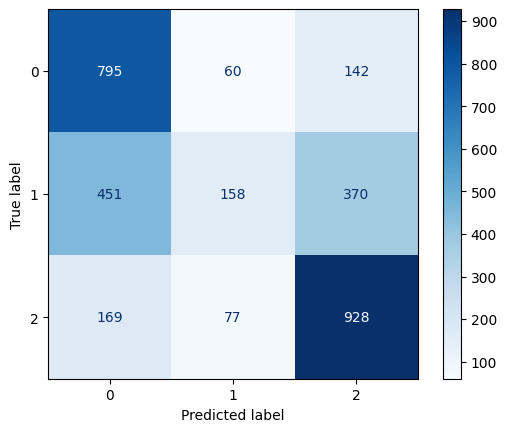

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_labels, y_hat)
n_classes = len(np.unique(y_test_labels))
display_labels = np.unique(y_test_labels) 

cmd = ConfusionMatrixDisplay(cm, display_labels=display_labels)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

### Bert Multiclass classification con 5 clases

In [1]:
import tensorflow
from transformers import TFBertModel
import tf_keras

2024-07-02 14:25:54.340649: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-02 14:25:54.432848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 14:25:54.503756: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 14:25:54.504164: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-02 14:25:54.574462: I tensorflow/core/platform/cpu_feature_gua

In [2]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

2024-07-02 14:26:04.240439: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-02 14:26:04.246057: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-02 14:26:04.248303: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
max_length = 140
output_shape = 5

In [4]:
import tensorflow as tf
#import 
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.F1Score(average='macro')])

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

In [8]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [15]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

In [17]:
import numpy as np
sentence_lens = []
for sentence in sentences:
  sentence_lens.append(len(sentence))

In [18]:
y_unique_values = df['score'].unique()
print(y_unique_values)

[1 2 3 4 5]


In [19]:
from tensorflow.keras.utils import to_categorical
y = df['score'].values
print("y shape:", y.shape)

y_adjusted = y - 1
y = to_categorical(y_adjusted)

output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
output shape: 5


In [20]:
from transformers import InputExample, InputFeatures  
from transformers import BertTokenizer
import numpy as np

In [21]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [22]:
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [23]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [24]:
def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i], 
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]
  
    return train_InputExamples, validation_InputExamples

 
def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [25]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [26]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')



In [27]:
X_test = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [28]:
y_test = y[idx_test]
print(y_test)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [29]:
history = model.fit(train_data, epochs=100, validation_data=validation_data)

Epoch 1/100
      1/Unknown - 21s 21s/step - loss: 1.9910 - accuracy: 0.0938 - f1_score: 0.0538

I0000 00:00:1719943048.812300  273317 service.cc:145] XLA service 0x72844d149df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719943048.812326  273317 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-07-02 14:57:28.818008: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-02 14:57:28.834933: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1719943048.885216  273317 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


    315/Unknown - 82s 196ms/step - loss: 1.6144 - accuracy: 0.2878 - f1_score: 0.2114

2024-07-02 14:58:30.477813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 14:58:30.477851: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 15239944843124795836
2024-07-02 14:58:30.477855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[model/tf_bert_model/bert/Shape_1/_8]]
2024-07-02 14:58:30.477873: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 865186995671661751
2024-07-02 14:58:30.477878: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 10970274492683263683
2024-07-02 14:58:30.477928: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 1342788290791

315/315 [==============================] - 102s 260ms/step - loss: 1.6144 - accuracy: 0.2878 - f1_score: 0.2114 - val_loss: 1.4975 - val_accuracy: 0.3798 - val_f1_score: 0.3021
Epoch 2/100
315/315 [==============================] - 77s 243ms/step - loss: 1.5264 - accuracy: 0.3341 - f1_score: 0.2608 - val_loss: 1.4511 - val_accuracy: 0.3702 - val_f1_score: 0.3100
Epoch 3/100
315/315 [==============================] - 77s 244ms/step - loss: 1.4721 - accuracy: 0.3610 - f1_score: 0.2919 - val_loss: 1.3867 - val_accuracy: 0.4302 - val_f1_score: 0.2795
Epoch 4/100
315/315 [==============================] - 77s 245ms/step - loss: 1.4402 - accuracy: 0.3698 - f1_score: 0.3018 - val_loss: 1.3775 - val_accuracy: 0.4194 - val_f1_score: 0.2640
Epoch 5/100
315/315 [==============================] - 77s 245ms/step - loss: 1.4176 - accuracy: 0.3913 - f1_score: 0.3198 - val_loss: 1.3528 - val_accuracy: 0.4345 - val_f1_score: 0.2774
Epoch 6/100
315/315 [==============================] - 77s 245ms/step -

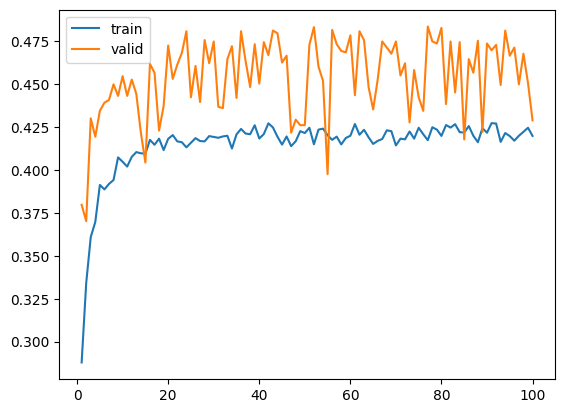

In [32]:
plot_train_metrics(history)

In [33]:
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 21s 174ms/step


array([[0.28516313, 0.35173813, 0.2559206 , 0.07701418, 0.03016397],
       [0.19060667, 0.3724165 , 0.21996984, 0.13225535, 0.08475164],
       [0.07478395, 0.21469493, 0.33706024, 0.2515336 , 0.12192723]],
      dtype=float32)

In [34]:
y_hat = np.argmax(y_hat_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print(y_test_labels)

[0 0 1 ... 2 3 3]


In [35]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 22s 180ms/step - loss: 1.2838 - accuracy: 0.4238 - f1_score: 0.4049


0.4238095283508301

[<tf.Tensor: shape=(3150, 140), dtype=int32, numpy=
array([[  101,  2129,  2000, ...,     0,     0,     0],
       [  101, 10166,  1012, ...,     0,     0,     0],
       [  101,  1045,  2288, ...,     0,     0,     0],
       ...,
       [  101,  1045,  2066, ...,     0,     0,     0],
       [  101,  5587,  2129, ...,     0,     0,     0],
       [  101,  2204, 10439, ...,     0,     0,     0]], dtype=int32)>, <tf.Tensor: shape=(3150, 140), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>]


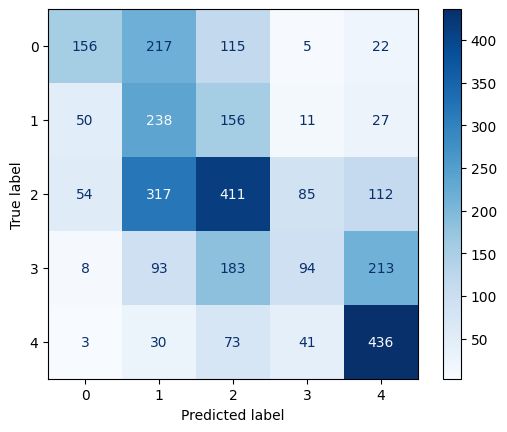

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(X_test)

cm = confusion_matrix(y_test_labels, y_hat)
n_classes = len(np.unique(y_test_labels))
display_labels = np.unique(y_test_labels) 

cmd = ConfusionMatrixDisplay(cm, display_labels=display_labels)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

### Se agrega una capa densa

In [1]:
import tensorflow
from transformers import TFBertModel
import tf_keras

2024-07-02 19:30:31.406772: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-02 19:30:31.421748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 19:30:31.443601: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 19:30:31.443640: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-02 19:30:31.455620: I tensorflow/core/platform/cpu_feature_gua

In [2]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

2024-07-02 19:30:48.486424: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-02 19:30:48.489726: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-02 19:30:48.492271: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
max_length = 140
output_shape = 5

In [6]:
import tensorflow as tf
#import 
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

dense_layer = tf.keras.layers.Dense(256, activation='relu')(pooled_output)

x = tensorflow.keras.layers.Dropout(0.2)(dense_layer)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.F1Score(average='macro')])

In [7]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

In [9]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [10]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

In [11]:
import numpy as np
sentence_lens = []
for sentence in sentences:
  sentence_lens.append(len(sentence))

In [12]:
from tensorflow.keras.utils import to_categorical
y = df['score'].values
print("y shape:", y.shape)

y_adjusted = y - 1
y = to_categorical(y_adjusted)

output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
output shape: 5


In [13]:
from transformers import InputExample, InputFeatures  
from transformers import BertTokenizer
import numpy as np

In [14]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [15]:
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [16]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [17]:
def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i], 
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]
  
    return train_InputExamples, validation_InputExamples

 
def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )


In [18]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [19]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [20]:
X_test = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [21]:
y_test = y[idx_test]
print(y_test)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [22]:
history = model.fit(train_data, epochs=100, validation_data=validation_data)

Epoch 1/100


I0000 00:00:1719960120.404189  293651 service.cc:145] XLA service 0x7ef913a511a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719960120.404212  293651 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-07-02 19:42:00.408482: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-02 19:42:00.424654: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1719960120.465679  293651 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


    315/Unknown - 84s 198ms/step - loss: 1.5526 - accuracy: 0.3217 - f1_score: 0.1982

2024-07-02 19:43:02.730551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 19:43:02.730593: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 16560357845272177340
2024-07-02 19:43:02.730597: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 7094210338327769913
2024-07-02 19:43:02.730601: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 1062977836091839891
2024-07-02 19:43:02.730604: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 15867734838356041163
2024-07-02 19:43:02.730703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[model_1/tf_bert_model/bert/Sha

315/315 [==============================] - 106s 267ms/step - loss: 1.5526 - accuracy: 0.3217 - f1_score: 0.1982 - val_loss: 1.4902 - val_accuracy: 0.3492 - val_f1_score: 0.1954
Epoch 2/100
315/315 [==============================] - 79s 251ms/step - loss: 1.4383 - accuracy: 0.3767 - f1_score: 0.2337 - val_loss: 1.3764 - val_accuracy: 0.4099 - val_f1_score: 0.2447
Epoch 3/100
315/315 [==============================] - 79s 252ms/step - loss: 1.3820 - accuracy: 0.4000 - f1_score: 0.2621 - val_loss: 1.3778 - val_accuracy: 0.4004 - val_f1_score: 0.2652
Epoch 4/100
315/315 [==============================] - 80s 252ms/step - loss: 1.3637 - accuracy: 0.4060 - f1_score: 0.2812 - val_loss: 1.3210 - val_accuracy: 0.4151 - val_f1_score: 0.2380
Epoch 5/100
315/315 [==============================] - 80s 253ms/step - loss: 1.3342 - accuracy: 0.4208 - f1_score: 0.3072 - val_loss: 1.3443 - val_accuracy: 0.4218 - val_f1_score: 0.2771
Epoch 6/100
315/315 [==============================] - 80s 253ms/step -

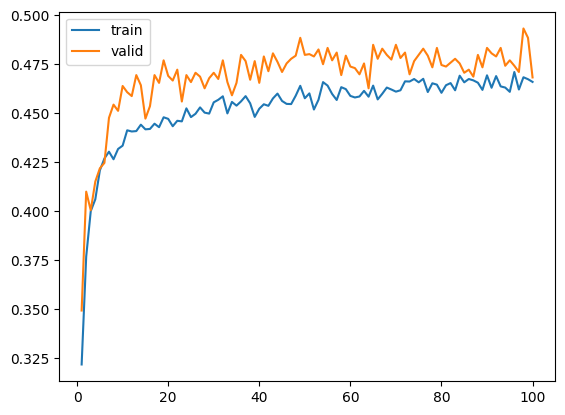

In [23]:
plot_train_metrics(history)

In [24]:
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 22s 175ms/step


array([[0.24884993, 0.2498754 , 0.33481815, 0.11450964, 0.05194685],
       [0.35895416, 0.29648045, 0.2655397 , 0.05872524, 0.02030044],
       [0.03634843, 0.11920068, 0.3821102 , 0.33185193, 0.13048871]],
      dtype=float32)

In [25]:
y_hat = np.argmax(y_hat_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print(y_test_labels)

[0 0 1 ... 2 3 3]


In [26]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 22s 177ms/step - loss: 1.2172 - accuracy: 0.4638 - f1_score: 0.3810


0.4638095200061798

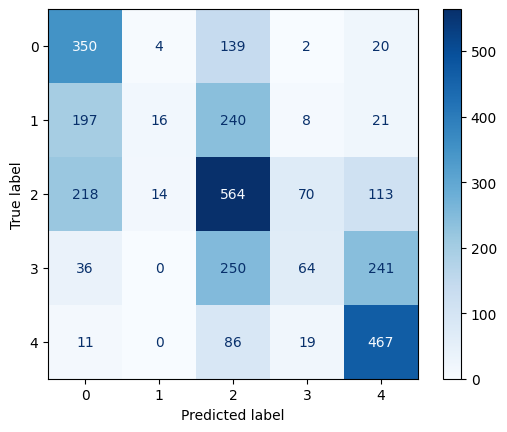

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_labels, y_hat)El F1-score correspondiente al primer entrenamiento con 20 epochs (3 clases) es 0.5391, y para los otros dos entrenamientos con 5 clases es 0.4049 y 0.3810 con 100 epochs. Esto indica que al usar 3 clases, el modelo predice mejor. De igual forma, al comparar el modelo inicial y al agregar una capa densa, se observa que el primero tiene un mayor F1-score. Al comparar las matrices de confusión, también se observa que, en general, se predicen mejor las clases sin la capa densa adicional.
n_classes = len(np.unique(y_test_labels))
display_labels = np.unique(y_test_labels) 

cmd = ConfusionMatrixDisplay(cm, display_labels=display_labels)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

El F1-score correspondiente al primer entrenamiento con 20 epochs (3 clases) es 0.5391, y para los otros dos entrenamientos con 5 clases es 0.4049 y 0.3810 con 100 epochs. Esto indica que al usar 3 clases, el modelo predice mejor. De igual forma, al comparar el modelo inicial y al agregar una capa densa, se observa que el primero tiene un mayor F1-score. Al comparar las matrices de confusión, también se observa que, en general, se predicen mejor las clases sin la capa densa adicional.

## 3 - BERT Fine tuning

In [ ]:
model2 = model1

# Colocar todas las layers como entrenables
for layer in model2.layers:
  layer.trainable = True

# Como es fine tunning se recomiendo utiliza al menos un learning rate 100 veces
# menor
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 140)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 140)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_119 (Dropout)           (None, 768)          0           tf_bert_model_1[0][1]      

In [ ]:
history2 = model2.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
315/315 [==============================] - 592s 2s/step - loss: 0.7534 - accuracy: 0.6527 - val_loss: 0.6668 - val_accuracy: 0.6992
Epoch 2/5
315/315 [==============================] - 570s 2s/step - loss: 0.6114 - accuracy: 0.7290 - val_loss: 0.6275 - val_accuracy: 0.7325
Epoch 3/5
315/315 [==============================] - 571s 2s/step - loss: 0.4785 - accuracy: 0.8009 - val_loss: 0.6383 - val_accuracy: 0.7571
Epoch 4/5
315/315 [==============================] - 571s 2s/step - loss: 0.3461 - accuracy: 0.8616 - val_loss: 0.6397 - val_accuracy: 0.7893
Epoch 5/5
315/315 [==============================] - 571s 2s/step - loss: 0.2142 - accuracy: 0.9166 - val_loss: 0.7829 - val_accuracy: 0.7976


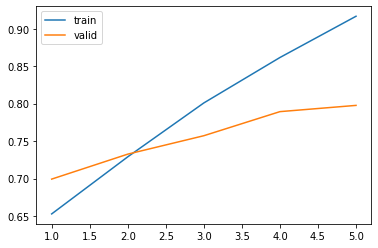

In [ ]:
plot_train_metrics(history2)

In [ ]:
y_hat_prob2 = model2.predict(X_test)
y_hat_prob2[:3]

array([[2.4404263e-01, 5.2928245e-01, 2.2667496e-01],
       [9.9471468e-01, 5.2647959e-03, 2.0519461e-05],
       [2.3615422e-02, 9.2708921e-01, 4.9295384e-02]], dtype=float32)

In [ ]:
y_hat2 = np.argmax(y_hat_prob2, axis=1)

In [ ]:
# Calcular la exactitud (accuracy)
scores = model1.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 61s 582ms/step - loss: 0.7595 - accuracy: 0.8035


0.8034920692443848

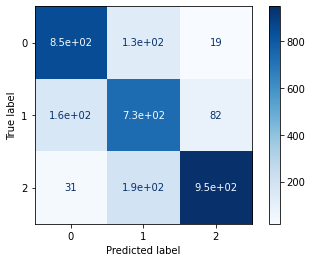

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat2)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

## Salvar el modelo

In [ ]:
model2.save_weights('bert_weights.h5')

In [ ]:
# Descargar los pesos a nuestra PC
# Solo es necesario si se desea repetir el uso de este modelo en el futuro
from google.colab import files
files.download('bert_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Levantar el modelo

In [ ]:
bert_model3 = TFBertModel.from_pretrained("bert-base-uncased")

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')

# attention_mask - is a binary mask which tells BERT which tokens to attend and which not to attend.
# Encoder will add the 0 tokens to the some sequence which smaller than MAX_SEQUENCE_LENGTH, 
# and attention_mask, in this case, tells BERT where is the token from the original data and where is 0 pad token:
attention_mask = tensorflow.keras.layers.Input((max_length,), dtype=tensorflow.int32, name='attention_mask')

# Get the pooled_output (embedding que representa toda la entrada)
output = bert_model3([input_ids, attention_mask])[1] 

# We can also add dropout as regularization technique:
output = tensorflow.keras.layers.Dropout(rate=0.2)(output)

# Se puede agregar más capas Densas en el medio si se desea

# Provide number of classes to the final layer:
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(output)

# Final model:
model3 = tensorflow.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

/usr/local/lib/python3.7/dist-packages/transformers/configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassifi

In [ ]:
model3.load_weights('bert_weights.h5')

## Ensayo

In [ ]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [ ]:
y_prob_ensayo = model3.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)])

Clasificación: positive


## Conclusiones

Se puede apreciar que luego de realizar el fine tuning el modelo se ajusta mucho mejor al problema. Existen diferentes formas de llevar a cabo este proceso, es importante que el learning rate sea mucho menor.\
Existen optimizadores pensados para fine tuning que realizan el ajuste de learning rate adaptativo a medida que se va entrenando capas más profundas del modelo.